## 0. Project Planning

- goal is to learn as much as possible - this is my first time handling more complex data
- i want to combine regression and classification - regression will be your typical predicting the house sale price (which i’ll interpret as asking price - how much homes are selling for in the area). my prediction will be the predicted house’s market value - the difference between the value and the asking price is one measure of how good the deal is. i can then sort homes into underpriced, fairly priced, and overpriced. then, i can apply classification to determine whether a house has good flipping potential and is worth checking out based on factors like if it’s “underpriced”, has room for renovation, has high demand and/or low supply (if i can extract that from the data), and sales cycle length.

##### EVAL:
regression will be based simply on r2 and mean squared error.
in classification i can try to mess with slightly more complex evaluation (like confusion matrix, and precision and recall for the “high flipping potential” class).
RELEVANT METRICS:
anything that has an impact on sales price
factors that signal whether flipping potential is high or low - underpriced, fast sales cycle, supply demand mismatch (if absent, i can use houses sold in the same neighbourhood as a proxy for demand), renovation potential.

i have to be sure to explain assumptions and limitations of the dataset and why I do what I do - succinctly but clearly.

## 1. Importing Dataset & Libraries

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
#importing dataset
df = pd.read_csv('AmesHousing.csv')
pd.set_option("display.max_columns", None)   # allows you to see all columns
df.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## 2. Exploratory Data Analysis

In [101]:
df.describe(include=object)

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
count,2930,2930,198,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,1155,2930,2930,2930,2850,2850,2847,2850,2849,2930,2930,2930,2929,2930,2930,1508,2773,2771,2771,2771,2930,13,572,106,2930,2930
unique,7,2,2,4,4,3,5,3,28,9,8,5,8,6,8,16,17,4,4,5,6,5,5,4,6,6,6,5,2,5,5,8,5,6,3,5,5,3,4,4,5,10,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2273,2918,120,1859,2633,2927,2140,2789,443,2522,2900,2425,1481,2321,2887,1026,1015,880,1799,2549,1310,1283,2616,1906,859,2499,2885,1495,2734,2682,1494,2728,744,1731,1231,2615,2665,2652,4,330,95,2536,2413


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [103]:
df.select_dtypes(include=int).describe()

,Order,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,10147.921843,6.094881,5.563140,1971.356314,1984.266553,1159.557679,335.455973,4.676792,1499.690444,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,7880.017759,1.411026,1.111537,30.245361,20.860286,391.890885,428.395715,46.310510,505.508887,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,876.250000,0.000000,0.000000,1126.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,1084.000000,0.000000,0.000000,1442.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,1384.000000,703.750000,0.000000,1742.750000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5095.000000,2065.000000,1064.000000,5642.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [104]:
df.select_dtypes(include=object).describe().T

,count,unique,top,freq
MS Zoning,2930,7,RL,2273
Street,2930,2,Pave,2918
Alley,198,2,Grvl,120
Lot Shape,2930,4,Reg,1859
Land Contour,2930,4,Lvl,2633
Utilities,2930,3,AllPub,2927
Lot Config,2930,5,Inside,2140
Land Slope,2930,3,Gtl,2789
Neighborhood,2930,28,NAmes,443
Condition 1,2930,9,Norm,2522


<Axes: xlabel='SalePrice', ylabel='Count'>

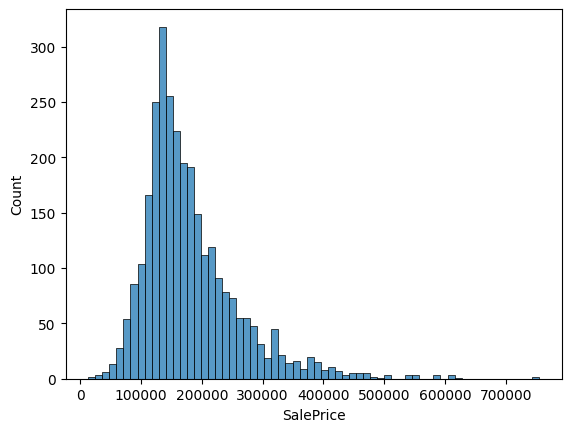

In [105]:
#vizualizing target (for the regression task)
sns.histplot(df['SalePrice'])


In [106]:
#the target variable looks to follow an approximate normal distribution, but the right tail is long. 
df.describe()['SalePrice']

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [107]:
#log transforming it can increase model accuracy by making the effect of outliers proportional.
df['SalePriceLog'] = np.log1p(df['SalePrice'])
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,SalePriceLog
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000,12.278398
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,11.561725
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000,12.055256
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000,12.404928
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,12.154258


<Axes: xlabel='SalePriceLog', ylabel='Count'>

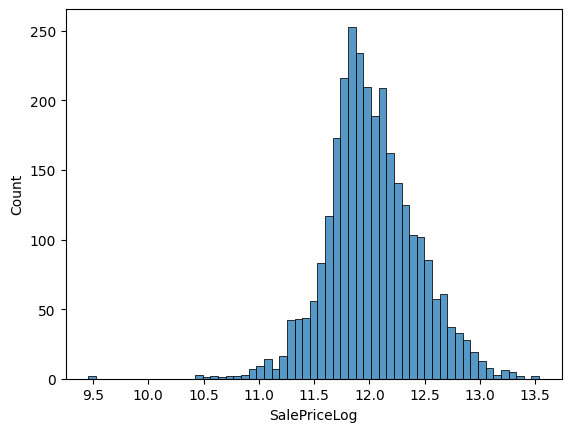

In [108]:
#a viz of the transformed target
sns.histplot(df['SalePriceLog'])

In [109]:
df.SalePrice.sort_values(ascending=True)

181      12789
1553     13100
726      34900
2843     35000
2880     35311
         ...  
44      611657
1063    615000
2445    625000
1760    745000
1767    755000
Name: SalePrice, Length: 2930, dtype: int64

In [110]:
#let's inspect the isolated values around 9.5
df.loc[df['SalePriceLog'] < 10]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,SalePriceLog
181,182,902207130,30,RM,68.0,9656,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,2,2,1923,1970,Gable,CompShg,AsbShng,AsbShng,NaN,0.0,TA,Fa,BrkTil,Fa,Fa,No,Unf,0.0,Unf,0.0,678.0,678.0,GasA,TA,N,SBrkr,832,0,0,832,0.0,0.0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1928.0,Unf,2.0,780.0,Fa,Fa,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Abnorml,12789,9.456419
1553,1554,910251050,20,A (agr),80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,NaN,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,Sal,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml,13100,9.480444


In [111]:
#abnormal sale conditions? how many of these are there
df['Sale Condition'].value_counts()

Sale Condition
Normal     2413
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: count, dtype: int64

<Axes: xlabel='Sale Condition', ylabel='SalePrice'>

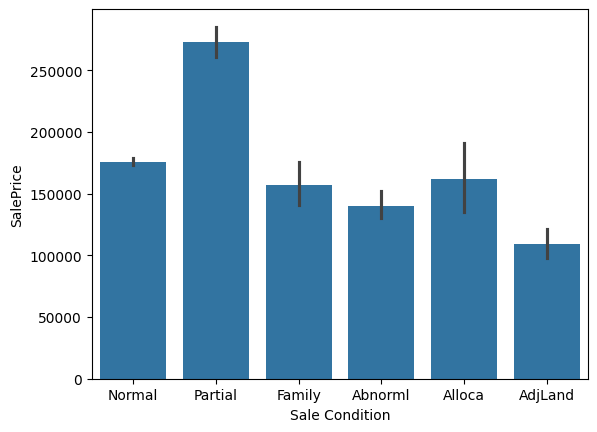

In [112]:
#a lot. what do i do with them? and the condition seems to have an impact on saleprice. i'll decide later.
sns.barplot(x='Sale Condition', y='SalePrice', data=df)

In [113]:
#let's ensure all sales happened at around the same time so we don't have to adjust anything for inflation
df['Yr Sold'].value_counts()

Yr Sold
2007    694
2009    648
2006    625
2008    622
2010    341
Name: count, dtype: int64

we might have to compare only between houses sold in the same year - for example, 2008 was a year of massive crashes on the market. on the other hand though, a deal is a deal... if i don't factor it in it'll just mean that 2008 will have more good deals, which actually makes perfct sense. so i can leave it. although, maybe i should note in my final polished project that the classifier that detects houses with a high flipping potential assumes that you'll exist in similar market conditions to when the house was bought - a crash like the one in 2008 would melt your wallet.

In [114]:
#linear correlation of continuous variables with the target
plt.figure(figsize=(20,20))
df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
SalePriceLog       0.946304
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Order             -0.031408
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0

<Figure size 2000x2000 with 0 Axes>

In [115]:
#let's also viz missing values
missing = df.isna().sum().sort_values(ascending=False)
missing.head(25)

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Yr Blt      159
Garage Finish      159
Garage Qual        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Area          1
Garage Cars          1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
dtype: int64

In [116]:
#checking Alley
df.Alley.value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

## 3. Data Cleaning

### 3.1 Inspecting Missing Values

In [117]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100
types = df.dtypes
unique_vals = df.nunique()

summary = pd.concat([missing, missing_percent, types, unique_vals], axis=1)
summary.columns = ['Missing', 'Missing_%', 'Type', 'Unique_Values']
print(summary[summary['Missing'] > 0])

                Missing  Missing_%     Type  Unique_Values
Pool QC            2917  99.556314   object              4
Misc Feature       2824  96.382253   object              5
Alley              2732  93.242321   object              2
Fence              2358  80.477816   object              4
Mas Vnr Type       1775  60.580205   object              4
Fireplace Qu       1422  48.532423   object              5
Lot Frontage        490  16.723549  float64            128
Garage Cond         159   5.426621   object              5
Garage Yr Blt       159   5.426621  float64            103
Garage Finish       159   5.426621   object              3
Garage Qual         159   5.426621   object              5
Garage Type         157   5.358362   object              6
Bsmt Exposure        83   2.832765   object              4
BsmtFin Type 2       81   2.764505   object              6
Bsmt Qual            80   2.730375   object              5
Bsmt Cond            80   2.730375   object             

<Axes: xlabel='Fireplace Qu', ylabel='SalePrice'>

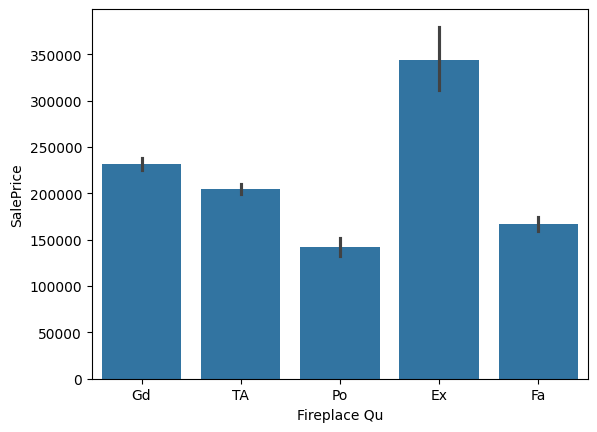

In [118]:
sns.barplot(x='Fireplace Qu', y='SalePrice', data=df)
#but i want to see missing values too

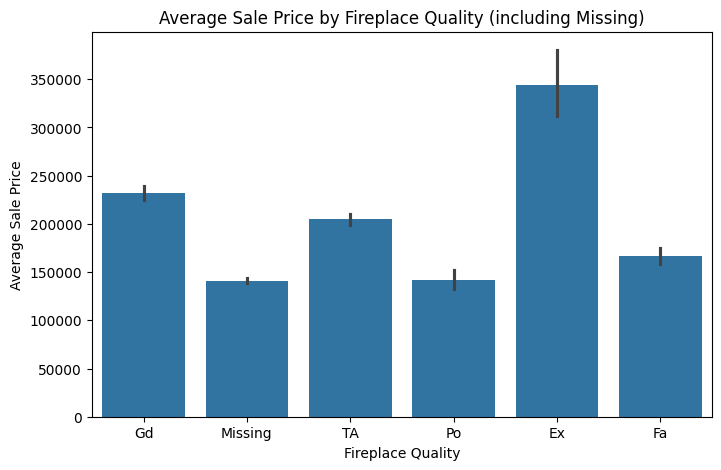

In [119]:
#with houses without a fireplace:
temp = df.copy()

temp['Fireplace Qu'] = temp['Fireplace Qu'].fillna('Missing')

# Now plot
plt.figure(figsize=(8,5))
sns.barplot(
    data=temp, 
    x='Fireplace Qu', 
    y='SalePrice', 
)
plt.title("Average Sale Price by Fireplace Quality (including Missing)")
plt.xlabel("Fireplace Quality")
plt.ylabel("Average Sale Price")
plt.show()

In [120]:
#pool quality is largely missing, let's see if it correlates with just not having a pool
df['Pool Area'].value_counts()
#only 13 houses had a pool - that means that it must be those houses that have a reported pool quality. 

Pool Area
0      2917
144       1
480       1
576       1
555       1
368       1
444       1
228       1
561       1
519       1
648       1
800       1
512       1
738       1
Name: count, dtype: int64

In [121]:
#pool quality appears to impact sales price
df['Pool QC'].value_counts()

Pool QC
Ex    4
Gd    4
TA    3
Fa    2
Name: count, dtype: int64

In [122]:
#too little instances/data for generalization. 
#similar features will be collapsed into a binary existence feature


<Axes: xlabel='Misc Feature', ylabel='SalePrice'>

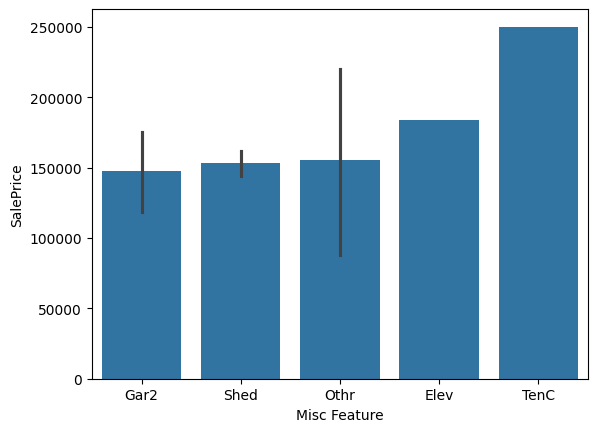

In [123]:
#misc feature
sns.barplot(x='Misc Feature',y='SalePrice', data=df)

In [124]:
df['Misc Feature'].value_counts()

Misc Feature
Shed    95
Gar2     5
Othr     4
Elev     1
TenC     1
Name: count, dtype: int64

In [125]:
df['Fireplace Qu'].value_counts()


Fireplace Qu
Gd    744
TA    600
Fa     75
Po     46
Ex     43
Name: count, dtype: int64

In [126]:
#again, too little for generalization.

In [127]:
df['Fence'].value_counts()

Fence
MnPrv    330
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64

<Axes: xlabel='Fence', ylabel='SalePrice'>

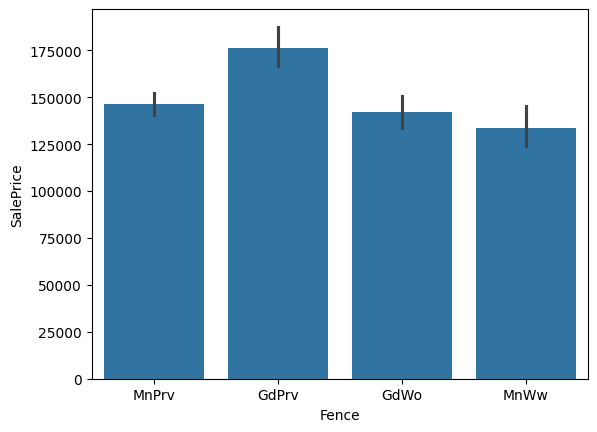

In [128]:
sns.barplot(x='Fence', y='SalePrice', data=df)

Mas Vnr Type
NaN        1775
BrkFace     880
Stone       249
BrkCmn       25
CBlock        1
Name: count, dtype: int64


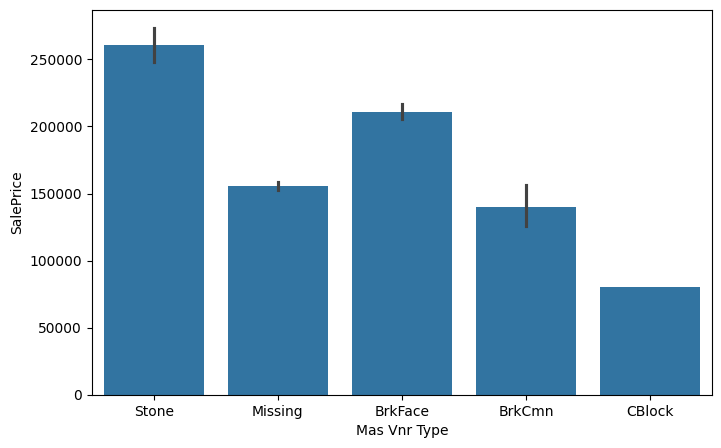

In [129]:
#masvnrtype?

tempor = df.copy()

tempor['Mas Vnr Type'] = tempor['Mas Vnr Type'].fillna('Missing')

# Now plot
plt.figure(figsize=(8,5))
sns.barplot(
    data=tempor, 
    x='Mas Vnr Type', 
    y='SalePrice', 
)

print(df['Mas Vnr Type'].value_counts(dropna=False))

<Axes: xlabel='Yr Sold', ylabel='SalePrice'>

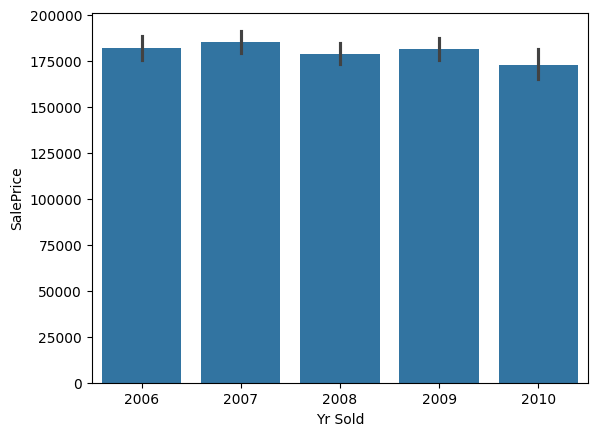

In [130]:
sns.barplot(data=df, x='Yr Sold', y='SalePrice', estimator='mean')

In [131]:
#let's inspect the rows with missing data about garages. 
df[df['Garage Yr Blt'].isna()]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,SalePriceLog
27,28,527425090,20,RL,70.0,10500,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1971,1971,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,432.0,Unf,0.0,432.0,864.0,GasA,TA,Y,SBrkr,864,0,0,864,0.0,0.0,1,0,3,1,TA,5,Typ,1,Po,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,ConLI,Normal,115000,11.652696
119,120,534276360,20,RL,77.0,9320,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1959,1959,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,569.0,Unf,0.0,381.0,950.0,GasA,Fa,Y,SBrkr,1225,0,0,1225,1.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,352,0,0,0,0,0,NaN,NaN,Shed,400,1,2010,WD,Normal,128950,11.767188
125,126,534427010,90,RL,98.0,13260,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,6,1962,2001,Hip,CompShg,HdBoard,HdBoard,BrkFace,144.0,TA,TA,CBlock,TA,TA,No,BLQ,1500.0,Unf,0.0,228.0,1728.0,GasA,TA,Y,SBrkr,1728,0,0,1728,2.0,0.0,2,0,6,2,TA,10,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2010,Oth,Abnorml,84900,11.349241
129,130,534450180,20,RL,50.0,7207,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,5,7,1958,2008,Gable,CompShg,Wd Sdng,Plywood,NaN,0.0,TA,Gd,CBlock,TA,TA,Gd,BLQ,696.0,Unf,0.0,162.0,858.0,GasA,Gd,Y,SBrkr,858,0,0,858,1.0,0.0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,117,0,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal,116500,11.665655
130,131,534451150,30,RL,55.0,5350,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,3,2,1940,1966,Gable,CompShg,Wd Sdng,Plywood,NaN,0.0,TA,Po,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,728.0,728.0,GasA,Ex,Y,SBrkr,1306,0,0,1306,0.0,0.0,1,0,3,1,Fa,6,Mod,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,263,0,0,0,0,0,NaN,GdWo,Shed,450,5,2010,WD,Normal,76500,11.245059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,2914,923226180,180,RM,21.0,1470,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,522.0,Unf,0.0,108.0,630.0,GasA,TA,Y,SBrkr,630,0,0,630,1.0,0.0,1,0,1,1,TA,3,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,73000,11.198228
2916,2917,923228130,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,5,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,553.0,Unf,0.0,77.0,630.0,GasA,Ex,Y,SBrkr,630,0,0,630,1.0,0.0,1,0,1,1,Ex,3,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000,11.429555
2918,2919,923228210,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,T

In [132]:
df[df[['Garage Yr Blt', 'Garage Type', 'Garage Qual', 'Garage Cond', 'Garage Finish']].isna().all(axis=1)]
#so the 157 rows of missingness overlap


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,SalePriceLog
27,28,527425090,20,RL,70.0,10500,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1971,1971,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,432.0,Unf,0.0,432.0,864.0,GasA,TA,Y,SBrkr,864,0,0,864,0.0,0.0,1,0,3,1,TA,5,Typ,1,Po,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,ConLI,Normal,115000,11.652696
119,120,534276360,20,RL,77.0,9320,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1959,1959,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,569.0,Unf,0.0,381.0,950.0,GasA,Fa,Y,SBrkr,1225,0,0,1225,1.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,352,0,0,0,0,0,NaN,NaN,Shed,400,1,2010,WD,Normal,128950,11.767188
125,126,534427010,90,RL,98.0,13260,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,6,1962,2001,Hip,CompShg,HdBoard,HdBoard,BrkFace,144.0,TA,TA,CBlock,TA,TA,No,BLQ,1500.0,Unf,0.0,228.0,1728.0,GasA,TA,Y,SBrkr,1728,0,0,1728,2.0,0.0,2,0,6,2,TA,10,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2010,Oth,Abnorml,84900,11.349241
129,130,534450180,20,RL,50.0,7207,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,5,7,1958,2008,Gable,CompShg,Wd Sdng,Plywood,NaN,0.0,TA,Gd,CBlock,TA,TA,Gd,BLQ,696.0,Unf,0.0,162.0,858.0,GasA,Gd,Y,SBrkr,858,0,0,858,1.0,0.0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,117,0,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal,116500,11.665655
130,131,534451150,30,RL,55.0,5350,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,3,2,1940,1966,Gable,CompShg,Wd Sdng,Plywood,NaN,0.0,TA,Po,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,728.0,728.0,GasA,Ex,Y,SBrkr,1306,0,0,1306,0.0,0.0,1,0,3,1,Fa,6,Mod,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,263,0,0,0,0,0,NaN,GdWo,Shed,450,5,2010,WD,Normal,76500,11.245059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,2914,923226180,180,RM,21.0,1470,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,522.0,Unf,0.0,108.0,630.0,GasA,TA,Y,SBrkr,630,0,0,630,1.0,0.0,1,0,1,1,TA,3,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,73000,11.198228
2916,2917,923228130,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,5,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,553.0,Unf,0.0,77.0,630.0,GasA,Ex,Y,SBrkr,630,0,0,630,1.0,0.0,1,0,1,1,Ex,3,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000,11.429555
2918,2919,923228210,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,T

In [133]:
#checking partial overlaps
df[['Garage Yr Blt', 'Garage Type', 'Garage Qual', 'Garage Cond', 'Garage Finish']].isna().sum(axis=1).value_counts()

0    2771
5     157
4       2
Name: count, dtype: int64

In [134]:
#checking the 2 rows where "type" is filled in
mask = (
    df[['Garage Yr Blt', 'Garage Qual', 'Garage Cond', 'Garage Finish']]
    .isna()
    .all(axis=1)
) & df['Garage Type'].notna()

df.loc[mask, ['Garage Yr Blt', 'Garage Qual', 'Garage Cond', 'Garage Finish', 'Garage Type']]

,Garage Yr Blt,Garage Qual,Garage Cond,Garage Finish,Garage Type
1356,NaN,NaN,NaN,NaN,Detchd
2236,NaN,NaN,NaN,NaN,Detchd


<Axes: xlabel='Garage Qual', ylabel='SalePrice'>

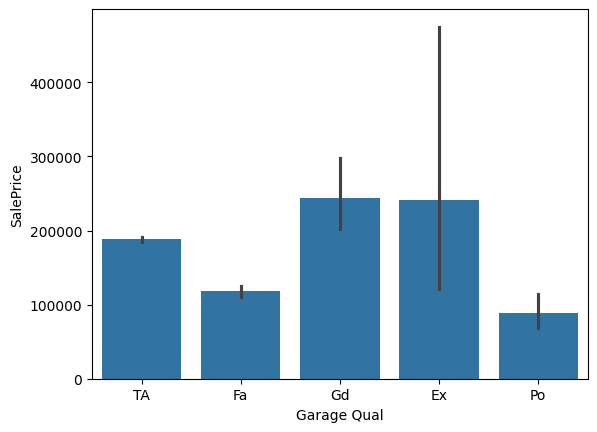

In [135]:
#most likely these are a data entry error - we'll treat them as a missing garage and collapse garage into a "has garage" variable

#does garage quality/condition impact saleprice
sns.barplot(x='Garage Qual', y='SalePrice', data=df)

In [136]:
df['Garage Qual'].value_counts()

Garage Qual
TA    2615
Fa     124
Gd      24
Po       5
Ex       3
Name: count, dtype: int64

In [137]:
df.SalePrice.value_counts()

SalePrice
135000    34
140000    33
130000    29
155000    28
145000    26
          ..
219990     1
159895     1
187687     1
217300     1
150900     1
Name: count, Length: 1032, dtype: int64

In [138]:
df.isna().sum().sort_values(ascending=False).head(25)

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Yr Blt      159
Garage Finish      159
Garage Qual        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Area          1
Garage Cars          1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
dtype: int64

In [139]:
#let's check the same thing with basements.
df[['Bsmt Exposure', 'BsmtFin Type 2', 'Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1']].isna().sum(axis=1).value_counts()

0    2846
5      80
1       4
Name: count, dtype: int64

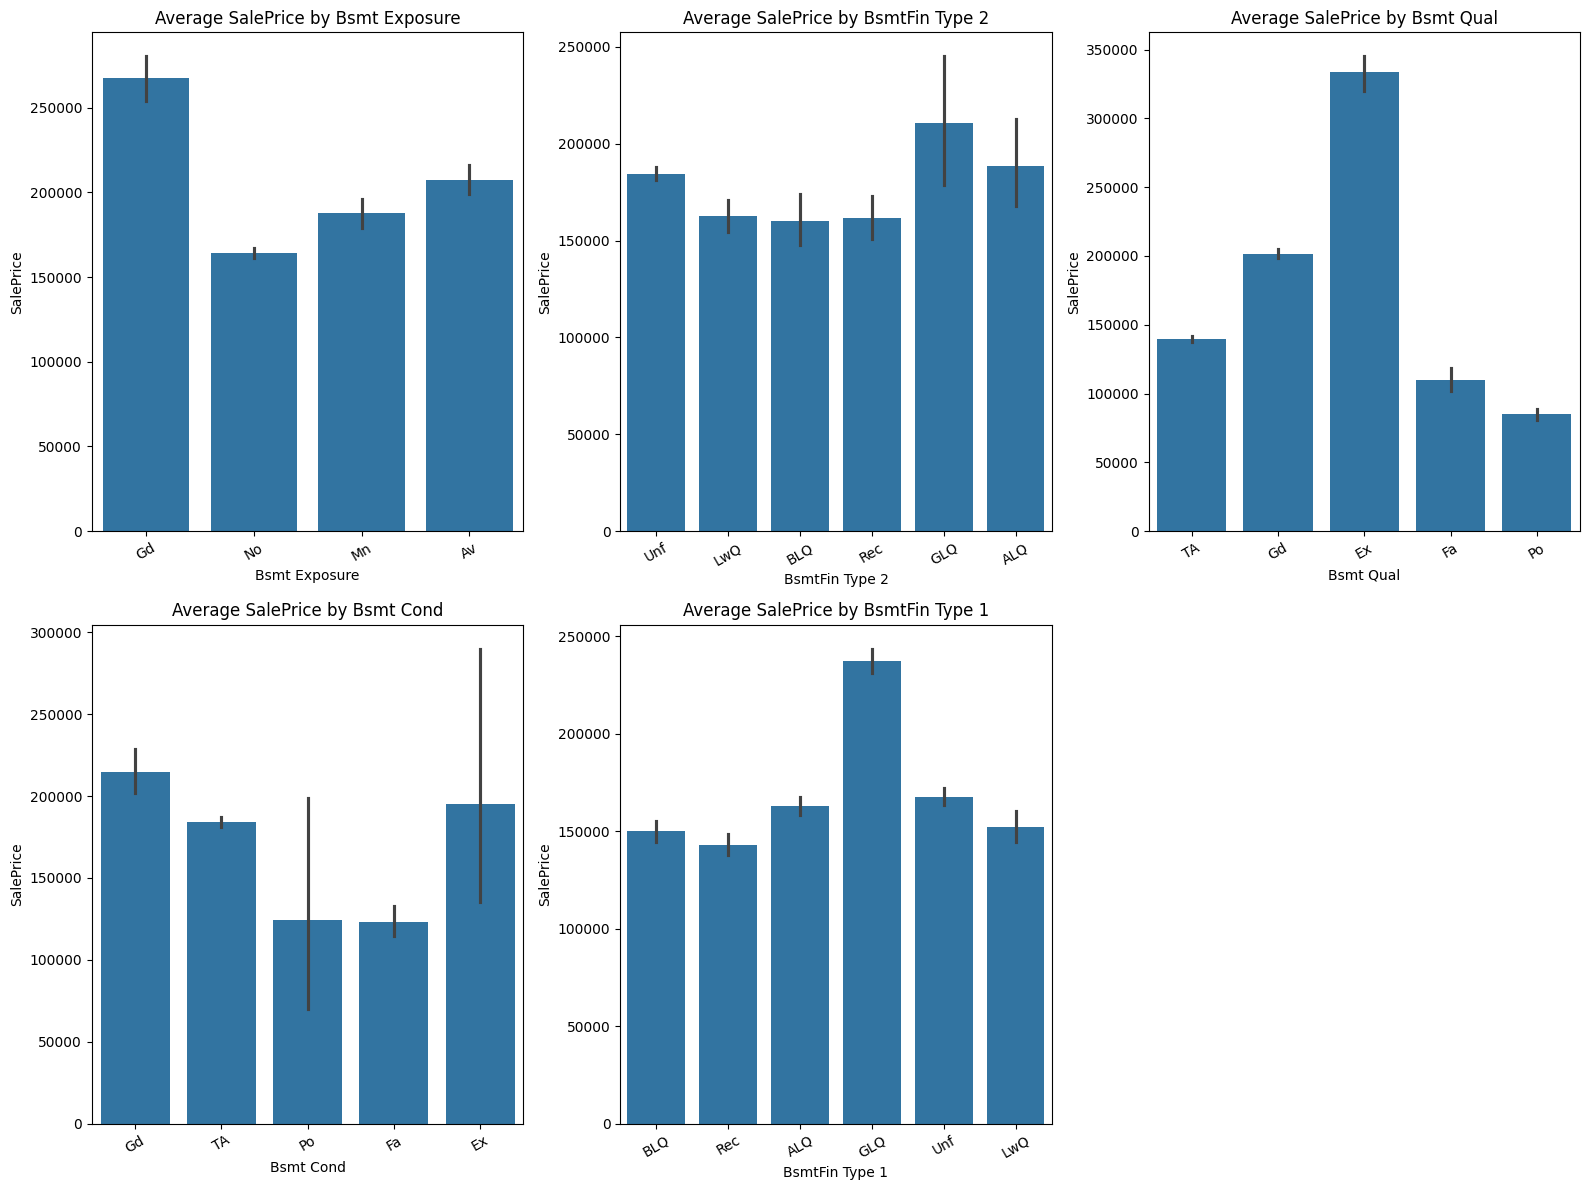

In [140]:
#so they are missing in the same places - we can assume this signals houses without basements. let's mass check which of these variables corelate
#most with the target - we'll engineer that one for the model, likely drop everything else.

garage_features = ['Bsmt Exposure', 'BsmtFin Type 2', 'Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1']

plt.figure(figsize=(16, 12))

for i, col in enumerate(garage_features, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=col, y='SalePrice', data=df, estimator='mean')
    plt.title(f'Average SalePrice by {col}')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

In [141]:
#bmst quality looks to seperate the best. lets ensure there's enough data for generalizability
df['Bsmt Qual'].value_counts()

Bsmt Qual
TA    1283
Gd    1219
Ex     258
Fa      88
Po       2
Name: count, dtype: int64

In [142]:
#only poor doesnt - we can group poor with fair.

### 3.2 Handling Missing Values

In [143]:
#the 5 features with the most missing values do not have enough generalizability to keep them seperate. let's turn them into binary existence features.
high_missing = df.columns[df.isna().mean() > 0.6]
high_missing

Index(['Alley', 'Mas Vnr Type', 'Pool QC', 'Fence', 'Misc Feature'], dtype='object')

In [144]:
#df.columns[df.isna().sum() > 2000]

In [145]:
#encoding a binary existance feature
for feature in high_missing:
    df[f"Has{feature}"] = df[feature].notna().astype(int)

df.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,SalePriceLog,HasAlley,HasMas Vnr Type,HasPool QC,HasFence,HasMisc Feature
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000,12.278398,0,1,0,0,0
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,11.561725,0,0,0,1,0
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000,12.055256,0,1,0,0,1
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000,12.404928,0,0,0,0,0
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,12.154258,0,0,0,1,0


In [146]:
#removing NaNs from original columns
for col in high_missing:
    df[col].fillna('None', inplace=True)

/var/folders/4v/1cr4vn8x4yv_p93m1plqw2s80000gn/T/ipykernel_26439/3972214148.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('None', inplace=True)


In [147]:
df.isna().sum().sort_values(ascending=False)

Fireplace Qu       1422
Lot Frontage        490
Garage Qual         159
Garage Cond         159
Garage Finish       159
                   ... 
Exterior 2nd          0
Exterior 1st          0
Roof Matl             0
Roof Style            0
HasMisc Feature       0
Length: 88, dtype: int64

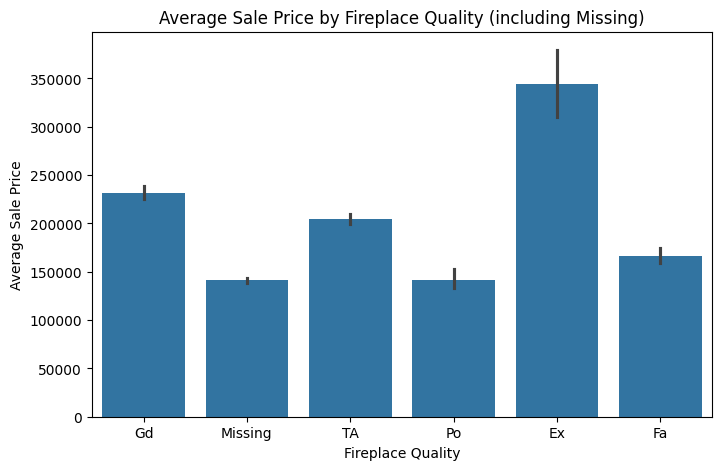

In [148]:
#fireplaces?
df['Fireplace Qu'].value_counts()

#vizing fireplace impac
temp = df.copy()

temp['Fireplace Qu'] = temp['Fireplace Qu'].fillna('Missing')

# Now plot
plt.figure(figsize=(8,5))
sns.barplot(
    data=temp, 
    x='Fireplace Qu', 
    y='SalePrice', 
)
plt.title("Average Sale Price by Fireplace Quality (including Missing)")
plt.xlabel("Fireplace Quality")
plt.ylabel("Average Sale Price")
plt.show()

In [149]:
#enough for generalization, and really does have an impact. lets' fill NaN with missing, and then ordinally encode.
df['Fireplace Qu'].fillna('None', inplace=True)

#df.head(20)

/var/folders/4v/1cr4vn8x4yv_p93m1plqw2s80000gn/T/ipykernel_26439/3294471680.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fireplace Qu'].fillna('None', inplace=True)


In [150]:
df['Fireplace Qu'].value_counts()


Fireplace Qu
None    1422
Gd       744
TA       600
Fa        75
Po        46
Ex        43
Name: count, dtype: int64

In [151]:
#we have 3 features that work with fireplaces for now. we'll see feature importance later and either choose one or engineer a combined feature.
for col in ["Fireplace Qu", "Fireplaces"]:
    print(f"\n{col}:\n", df[col].value_counts(dropna=False))


Fireplace Qu:
 Fireplace Qu
None    1422
Gd       744
TA       600
Fa        75
Po        46
Ex        43
Name: count, dtype: int64

Fireplaces:
 Fireplaces
0    1422
1    1274
2     221
3      12
4       1
Name: count, dtype: int64


In [152]:
#lot frontage
df['Lot Frontage'].value_counts()

Lot Frontage
60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
        ... 
119.0      1
137.0      1
25.0       1
152.0      1
133.0      1
Name: count, Length: 128, dtype: int64

In [153]:
#LotFrontage has ~17% missing values. For the sake of efficiency, imputing by neighborhood median is a practical approach to preserve most predictive signal, but introduces partial collinearity with the neighborhood feature.
#For models sensitive to multicollinearity, one could alternatively predict lot frontage from lot area/shape using predictive regression methods.
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    66.910112
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.241379
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.157895
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [154]:
#above we can see that some neighborhood lot frontage means are NaN. We need a fallback for the lot frontages in these neighborhoods to impute to global mean
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage']\
                       .transform(lambda x: x.fillna(x.median()))

df['Lot Frontage'].fillna(df['Lot Frontage'].median(), inplace=True)


/Users/szymonkot/miniconda3/envs/py313/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/szymonkot/miniconda3/envs/py313/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/var/folders/4v/1cr4vn8x4yv_p93m1plqw2s80000gn/T/ipykernel_26439/1413173787.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Lo

In [155]:
df.isna().sum().sort_values(ascending=False).head(20)

Garage Qual       159
Garage Cond       159
Garage Finish     159
Garage Yr Blt     159
Garage Type       157
Bsmt Exposure      83
BsmtFin Type 2     81
Bsmt Qual          80
Bsmt Cond          80
BsmtFin Type 1     80
Mas Vnr Area       23
Bsmt Full Bath      2
Bsmt Half Bath      2
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Electrical          1
Garage Cars         1
Garage Area         1
dtype: int64

In [156]:
#for the garage features, NaN typically means no garage. let's impute this accordingly, not dropping any features yet - waiting for feature engineering and mathematical selection
garage_features = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Garage Yr Blt']
for col in garage_features:
    if df[col].dtype == 'object':
        df[col].fillna('NoGarage', inplace=True)
    else:
        df[col].fillna(0, inplace=True)

/var/folders/4v/1cr4vn8x4yv_p93m1plqw2s80000gn/T/ipykernel_26439/3273623774.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('NoGarage', inplace=True)
/var/folders/4v/1cr4vn8x4yv_p93m1plqw2s80000gn/T/ipykernel_26439/3273623774.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [157]:
#let's do the same thing for the basement features (the slight inconsistencies (83 missing vs 80 missing are likely due to human entry error)
#they are all object features
bsmt_features = ['Bsmt Exposure', 'BsmtFin Type 2', 'Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1']

for feature in bsmt_features:
    print(df[feature].dtype)

object
object
object
object
object


In [158]:
#removing NaNs
for feature in bsmt_features:
    df[feature].fillna('NoBasement', inplace=True)

for feature in bsmt_features:
    print(df[feature].isna().sum())


0
0
0
0
0


/var/folders/4v/1cr4vn8x4yv_p93m1plqw2s80000gn/T/ipykernel_26439/323329741.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna('NoBasement', inplace=True)


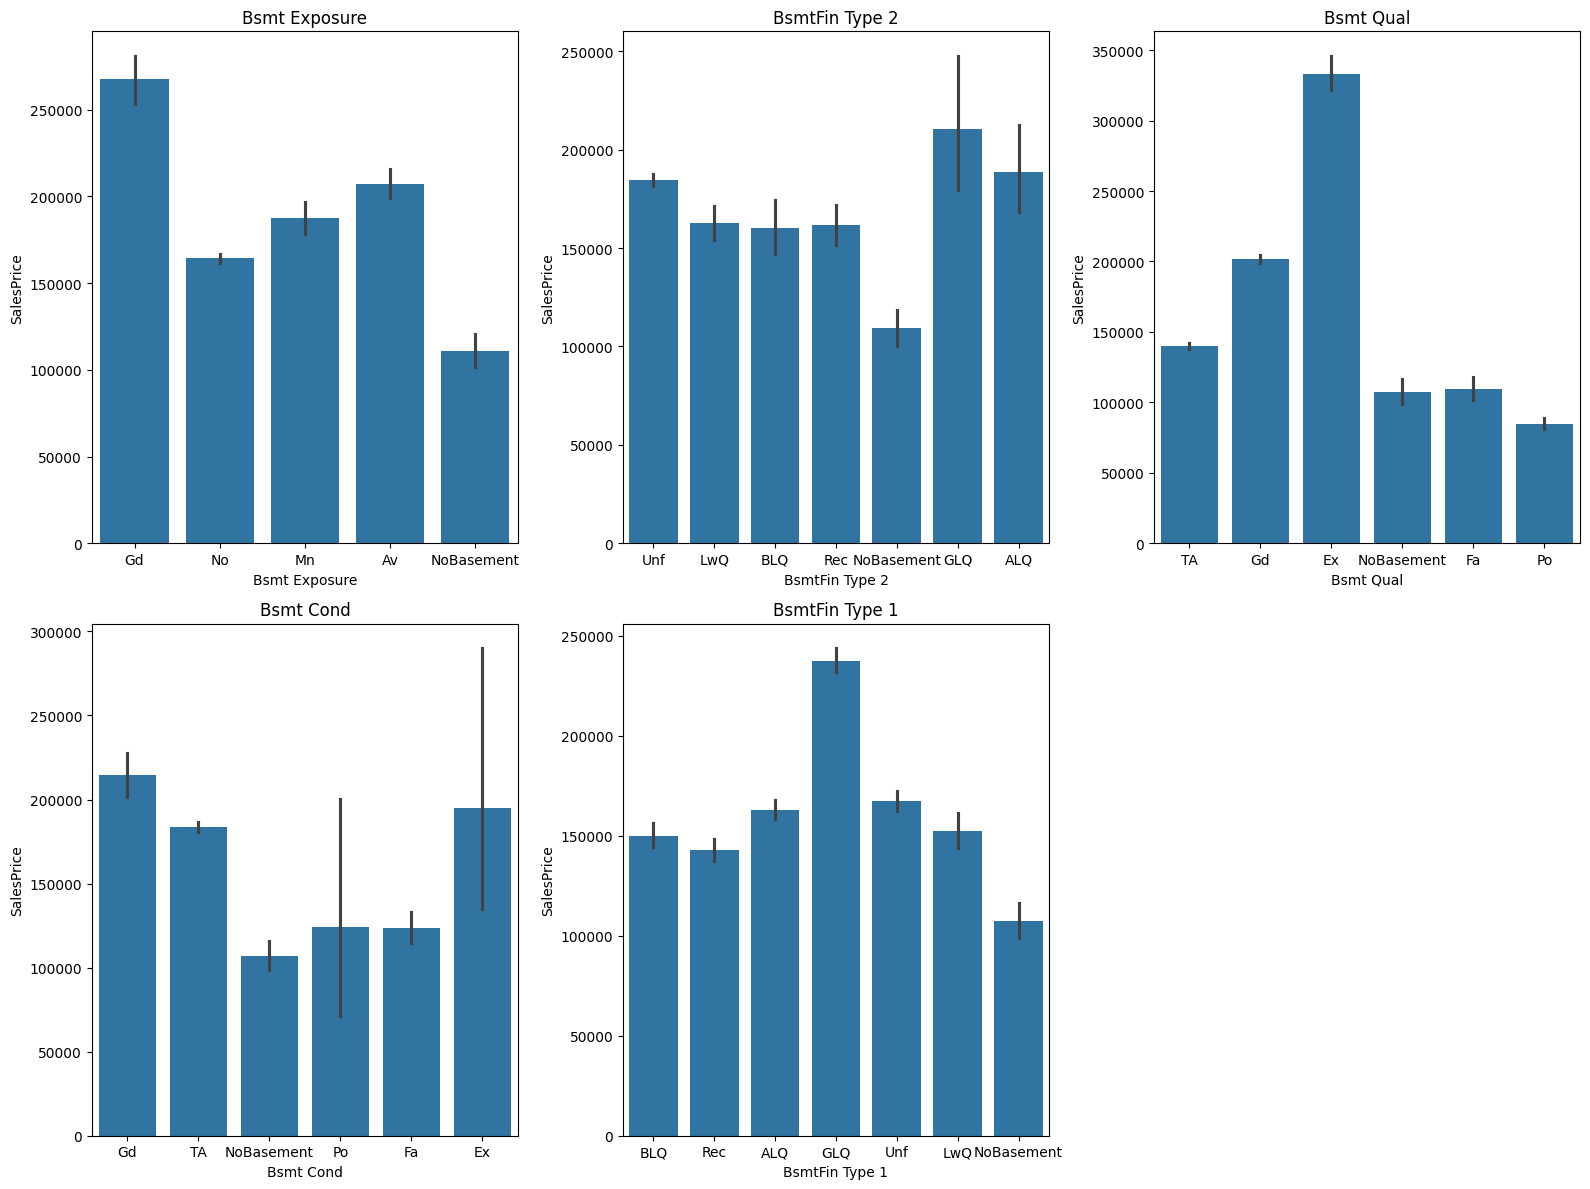

In [159]:
#quickly vizualizing impact. 


plt.figure(figsize=(16,12))
for i, item in enumerate(bsmt_features, 1):
    plt.subplot(2, 3, i)
    sns.barplot(data=df, x=item, y='SalePrice')
    plt.title(f'{item}')
    plt.ylabel('SalesPrice')

plt.tight_layout()


In [160]:
df.isna().sum().sort_values(ascending=False).head(20)

Mas Vnr Area      23
Bsmt Full Bath     2
Bsmt Half Bath     2
Total Bsmt SF      1
Garage Cars        1
BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Garage Area        1
Electrical         1
Kitchen AbvGr      0
Bedroom AbvGr      0
Garage Qual        0
Half Bath          0
TotRms AbvGrd      0
Functional         0
Fireplaces         0
Fireplace Qu       0
Garage Type        0
Garage Yr Blt      0
dtype: int64

Mas Vnr Area
0.0       1748
120.0       15
176.0       13
200.0       13
216.0       12
          ... 
714.0        1
647.0        1
1290.0       1
495.0        1
443.0        1
Name: count, Length: 445, dtype: int64

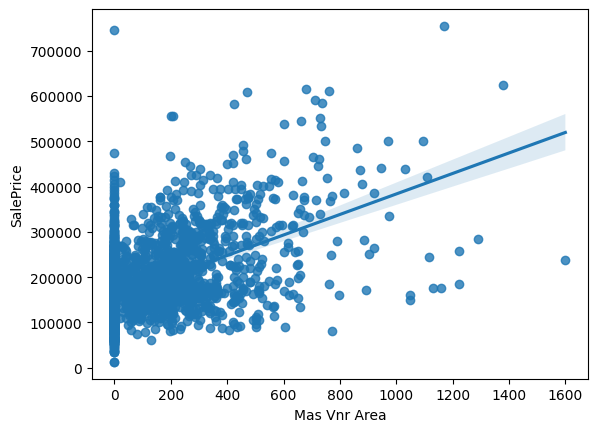

In [161]:
#mas vnr area is a continuous feature
sns.regplot(data=df, x='Mas Vnr Area', y='SalePrice')
df['Mas Vnr Area'].value_counts()

In [162]:
#coorelates heavily with saleprice
df.corr(numeric_only=True)['SalePrice']['Mas Vnr Area']

np.float64(0.5082848443957306)

In [163]:
#lets check if these missing cases have an existing Mas Vnr Type inputted - if so, that means its an entry error and we can't just impute with zero.
df.loc[df['Mas Vnr Area'].isna(), 'Mas Vnr Type']

55      None
484     None
517     None
538     None
867     None
1095    None
1119    None
1122    None
1127    None
1184    None
1454    None
1727    None
1751    None
1783    None
1799    None
1839    None
1840    None
2229    None
2260    None
2382    None
2392    None
2455    None
2823    None
Name: Mas Vnr Type, dtype: object

In [164]:
#the missing veneer area rows are also missing the veneer type - it's fair to say that means the veneer doesn't exist so we can impute as 0
df['Mas Vnr Area'].fillna(0, inplace=True)
print(df['Mas Vnr Area'].isna().sum())

0


/var/folders/4v/1cr4vn8x4yv_p93m1plqw2s80000gn/T/ipykernel_26439/33470348.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Mas Vnr Area'].fillna(0, inplace=True)


In [176]:
#we are left with a few columns with few missing features.
missing_counts = df.isna().sum().sort_values(ascending=False) 
missing_cols = missing_counts[missing_counts > 0]
missing_cols

Bsmt Full Bath    2
Bsmt Half Bath    2
Total Bsmt SF     1
Garage Area       1
Garage Cars       1
BsmtFin SF 2      1
Bsmt Unf SF       1
BsmtFin SF 1      1
Electrical        1
dtype: int64

In [179]:
#Eight features have 1–2 missing values each (~0.05% of the dataset).
#Dropping these rows is negligible for model performance and avoids overcomplicating imputation for a handful of cases.

df.dropna(subset=['Bsmt Full Bath', 'Bsmt Half Bath', 'Total Bsmt SF', 'Garage Area', 'Garage Cars', 'BsmtFin SF 2', 'Bsmt Unf SF', 'BsmtFin SF 1', 'Electrical'], inplace=True)
print(df.shape, '\n')
print(df.isna().sum().sort_values(ascending=False))

(2926, 88) 

Order              0
PID                0
Garage Qual        0
Garage Area        0
Garage Cars        0
                  ..
Mas Vnr Area       0
Mas Vnr Type       0
Exterior 2nd       0
Exterior 1st       0
HasMisc Feature    0
Length: 88, dtype: int64


### 3.3 Handling Outliers